In [3]:
%matplotlib inline


# Scientific Computation Lab 9 solution







In this lab, you will learn about time-delay reconstructions of nonlinear dynamics from a single time series. We will use simulations of the Lorenz equations to generate the data, choose an appropriate time delay and vector dimension, and then visually compare the reconstruction and full solution.
Code for solving the Lorenz equations is below.

$\frac{dx}{dt}=\sigma(y-x)$

$\frac{dy}{dt}=rx-y-xz $

$\frac{dz}{dt}=xy-bz$

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist

def RHS(f,t,r,s,b):
    """RHS of Lorenz equations
    """
    df = np.zeros_like(f)
    df[0] = s*(f[1]-f[0])
    df[1] = r*f[0]-f[1]-f[0]*f[2]
    df[2] = f[0]*f[1] - b*f[2]
    return df

#set parameters
r,s,b = 28,10,8/3
T = 240 #timespan
Nt = 12800 
t = np.linspace(0,T,Nt+1)
f0 = [1,1,1] #arbitrary initial condition
dt = t[1] #timestep

#call odeint and rearrange output
f = odeint(RHS,f0,t,args=(r,s,b))
x,y,z = f[:,0],f[:,1],f[:,2]


The cell below will create a 3d plot generated by the code above:

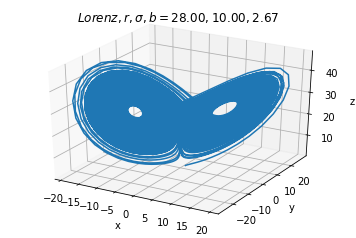

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('$Lorenz, r,\sigma,b=%3.2f,%3.2f,%3.2f$' %(r,s,b))

1) Plot x(t) and based on the figure, set nskip as the number of points to discard from the start of the solution

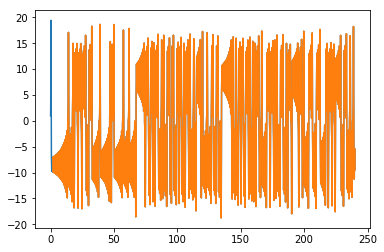

In [6]:
#Add code here
#nskip=?
#t,x,y,z = t[nskip:],x[nskip:],y[nskip],z[nskip] #discard initial transient
plt.figure()
plt.plot(t,x)
nskip=100
t,x,y,z = t[nskip:],x[nskip:],y[nskip:],z[nskip:]
plt.plot(t,x)
Nt = t.size
T = t[-1]-t[0]

2) Use Welch's method to compute the power spectrum of *x* and then use the results to estimate a "dominant" frequency, f (remember to scale with Nt/T). Check that the timestep in the data is small compared to 1/f. 

f= [0.20834974]
dt,1/f= 0.018749999999999822 [4.79962208]


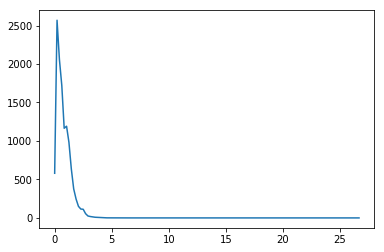

In [8]:
#IMPORTANT: A larger T is needed for the simulation above 
#to get an accurate estimate of f
from scipy.signal import welch
#add code here
from scipy.signal import welch
#add code here
w,P = welch(x)
fr = w*Nt/T
plt.figure()
plt.plot(fr,P)

f = w[P==P.max()]*Nt/T
print("f=",f)
print("dt,1/f=",t[1]-t[0],1/f)

2) Set the time delay to be $\tau=1/(5f)$
and construct ($Nt-2\Delta$) 3-dimensional vectors. The *ith* vector should correspond to $[x(t_i),x(t_i-\tau),x(t_i-2\tau)]$, $i \in \{0,1,...,Nt-1\}$ where $\Delta = int(\tau/dt)$
These vectors can be collected into a N x 3 matrix (using, say, np.vstack and taking the transpose) with $N = Nt-2\Delta$, but you don't need to do that here.

In [9]:
tau = 1/(5*f)
Del = int(tau/dt)
print(Del,x.size)
v1 = np.vstack([x[:-2*Del],x[Del:-Del],x[2*Del:]])
v1.shape

51 12701


(3, 12599)

3) Plot the 2nd vector against the 1st, compare this to a plot of x vs y

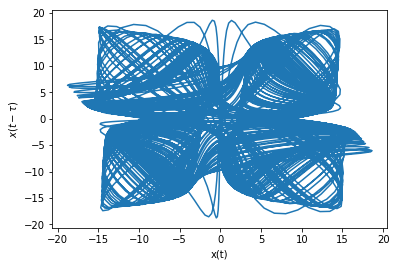

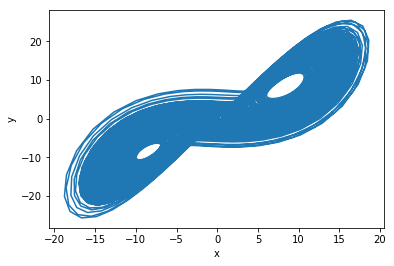

In [14]:
#add code here
plt.figure()
plt.plot(v1[0],v1[1])
plt.xlabel('x(t)')
plt.ylabel(r'$x(t-\tau)$')
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

4) Repeat the steps above with $\tau$ reduced by a factor of 4. Do the plots look more (or less) similar?

12 12701


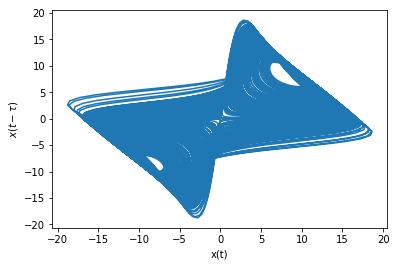

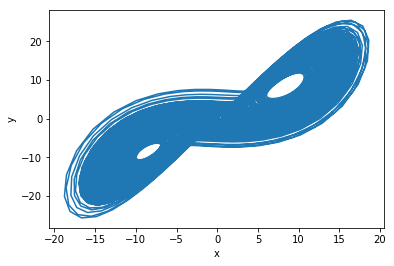

In [15]:
tau = tau/4
Del = int(tau/dt)
print(Del,x.size)
v1 = np.vstack([x[:-2*Del],x[Del:-Del],x[2*Del:]])
v1.shape
plt.figure()
plt.plot(v1[0],v1[1])
plt.xlabel('x(t)')
plt.ylabel(r'$x(t-\tau)$')
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

3) Now, construct a 3d plot of the time-delay vectors

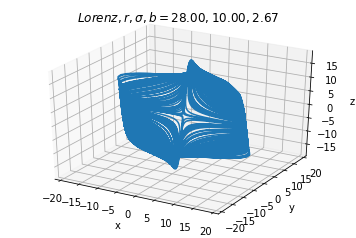

In [16]:
#add code here
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(v1[0],v1[1],v1[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('$Lorenz, r,\sigma,b=%3.2f,%3.2f,%3.2f$' %(r,s,b))

Note that the time-delay vectors with the smaller $\tau$ should produce a visually "better" approximation to the solution, however the larger value of $\tau$ is better for computing the correlation sum.